In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airport= pd.read_csv('airports.csv')
carrier= pd.read_csv('carriers.csv')
planes_data= pd.read_csv('plane-data.csv')
df_2005= pd.read_csv('2005.csv')
df_2006= pd.read_csv('2006.csv')

# Combining 2005 and 2006 data
df= pd.concat([df_2005,df_2006],ignore_index=True)

In [3]:
df.shape

(14282518, 29)

In [4]:
df.isna().sum()

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                255664
CRSDepTime                  0
ArrTime                285878
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                     0
ActualElapsedTime      285878
CRSElapsedTime              4
AirTime                285878
ArrDelay               285878
DepDelay               255664
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14026853
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
dtype: int64

In [5]:
df_summary = df.describe()
print(df_summary)

               Year         Month    DayofMonth     DayOfWeek       DepTime  \
count  1.428252e+07  1.428252e+07  1.428252e+07  1.428252e+07  1.402685e+07   
mean   2.005500e+03  6.521967e+00  1.572497e+01  3.947242e+00  1.342461e+03   
std    5.000000e-01  3.417978e+00  8.786326e+00  1.990941e+00  4.766457e+02   
min    2.005000e+03  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    2.005000e+03  4.000000e+00  8.000000e+00  2.000000e+00  9.320000e+02   
50%    2.006000e+03  7.000000e+00  1.600000e+01  4.000000e+00  1.330000e+03   
75%    2.006000e+03  9.000000e+00  2.300000e+01  6.000000e+00  1.734000e+03   
max    2.006000e+03  1.200000e+01  3.100000e+01  7.000000e+00  2.930000e+03   

         CRSDepTime       ArrTime    CRSArrTime     FlightNum  \
count  1.428252e+07  1.399664e+07  1.428252e+07  1.428252e+07   
mean   1.335110e+03  1.489168e+03  1.497803e+03  2.114719e+03   
std    4.634256e+02  5.004951e+02  4.795442e+02  1.918280e+03   
min    0.000000e+00  1.00000

In [6]:
#Dataframe summary
pd.DataFrame({'unique':df.nunique(),
              'missing': df.isna().sum()/df.count(),
              'dtypes':df.dtypes})

,unique,missing,dtypes
Year,2,0.000000e+00,int64
Month,12,0.000000e+00,int64
DayofMonth,31,0.000000e+00,int64
DayOfWeek,7,0.000000e+00,int64
DepTime,1601,1.822675e-02,float64
CRSDepTime,1223,0.000000e+00,int64
ArrTime,1679,2.042476e-02,float64
CRSArrTime,1406,0.000000e+00,int64
UniqueCarrier,22,0.000000e+00,object
FlightNum,7555,0.000000e+00,int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14282518 entries, 0 to 14282517
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay    

In [3]:
# Impute NA values using interpolation
df['DepTime'] = df['DepTime'].interpolate(method='linear', limit_direction='both', axis=0) 
df['ArrTime'] = df['ArrTime'].interpolate(method='linear', limit_direction='both', axis=0) 
df['ActualElapsedTime'] = df['ActualElapsedTime'].interpolate(method='linear', limit_direction='both', axis=0) 
df['CRSElapsedTime'] = df['CRSElapsedTime'].interpolate(method='linear', limit_direction='both', axis=0) 
df['AirTime'] = df['AirTime'].interpolate(method='linear', limit_direction='both', axis=0) 
df['ArrDelay'] = df['ArrDelay'].interpolate(method='linear', limit_direction='both', axis=0) 
df['DepDelay'] = df['DepDelay'].interpolate(method='linear', limit_direction='both', axis=0) 

# Exploratory Data Analysis

#### Q1. When is the best time of day, day of the week, and time of year to fly to minimise delays?

In [4]:
pd.set_option("display.max_columns",30)
df1=df.copy(deep=True) # Make a copy of dataset for Q1
df1.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,N935UA,158.0,174.0,131.0,-18.0,-2.0,BOS,ORD,867,4,23,0,NaN,0,0,0,0,0,0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,N941UA,157.0,174.0,136.0,-23.0,-6.0,BOS,ORD,867,6,15,0,NaN,0,0,0,0,0,0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,N342UA,158.0,175.0,131.0,-24.0,-7.0,BOS,ORD,867,9,18,0,NaN,0,0,0,0,0,0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,N326UA,150.0,174.0,129.0,-33.0,-9.0,BOS,ORD,867,11,10,0,NaN,0,0,0,0,0,0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,N902UA,121.0,152.0,106.0,3.0,34.0,ORD,BOS,867,5,10,0,NaN,0,0,0,0,0,0
5,2005,1,3,1,2042.0,1900,9.0,2232,UA,542,N904UA,147.0,152.0,97.0,97.0,102.0,ORD,BOS,867,3,47,0,NaN,0,23,0,0,0,74
6,2005,1,4,2,2046.0,1900,2357.0,2232,UA,542,N942UA,131.0,152.0,100.0,85.0,106.0,ORD,BOS,867,5,26,0,NaN,0,46,0,0,0,39
7,2005,1,5,3,2078.0,1900,1182.5,2232,UA,542,000000,124.5,152.0,100.5,95.0,118.0,ORD,BOS,867,0,0,1,B,0,0,0,0,0,0
8,2005,1,6,4,2110.0,1900,8.0,2223,UA,542,N920UA,118.0,143.0,101.0,105.0,130.0,ORD,BOS,867,2,15,0,NaN,0,16,0,0,0,89
9,2005,1,7,5,1859.0,1900,2235.0,2223,UA,542,N340UA,156.0,143.0,96.0,12.0,-1.0,ORD,BOS,867,4,56,0,NaN,0,0,0,0,0,0


##### Only when Arrival Delay is longer than 15 minutes there’s data about what caused the delay. Arrival Delay is the sum of CarrierDelay, WeatherDelay, NASDelay and LateAircraftDelay. 
#### More often than not, airports and carriers allocate a CRSElapsedTime higher than the actual time spent in the Taxi In + Taxi out + Airtime operations (Actual Elapsed Time). 
#### This is the reason why, when planes take off on time, landing usually takes place before the expected time! It also allows to absorb delay by late aircraft down the lane of chained flights.

In [10]:
# Define numbers by actual days and months.
df.loc[df['DayOfWeek'] == 1, ['DayOfWeek']] = 'Monday'
df.loc[df['DayOfWeek'] == 2, ['DayOfWeek']] = 'Tuesday'
df.loc[df['DayOfWeek'] == 3, ['DayOfWeek']] = 'Wednesday'
df.loc[df['DayOfWeek'] == 4, ['DayOfWeek']] = 'Thursday'
df.loc[df['DayOfWeek'] == 5, ['DayOfWeek']] = 'Friday'
df.loc[df['DayOfWeek'] == 6, ['DayOfWeek']] = 'Saturday'
df.loc[df['DayOfWeek'] == 7, ['DayOfWeek']] = 'Sunday'

In [11]:
df.loc[df['Month'] == 1,['Month']] = 'January'
df.loc[df['Month'] == 2,['Month']] = 'Febrary'
df.loc[df['Month'] == 3,['Month']] = 'March'
df.loc[df['Month'] == 4,['Month']] = 'April'
df.loc[df['Month'] == 5,['Month']] = 'May'
df.loc[df['Month'] == 6,['Month']] = 'June'
df.loc[df['Month'] == 7,['Month']] = 'July'
df.loc[df['Month'] == 8,['Month']] = 'August'
df.loc[df['Month'] == 9,['Month']] = 'September'
df.loc[df['Month'] == 10,['Month']] = 'October'
df.loc[df['Month'] == 11,['Month']] = 'November'
df.loc[df['Month'] == 12,['Month']] = 'December'

<AxesSubplot:xlabel='Month', ylabel='count'>

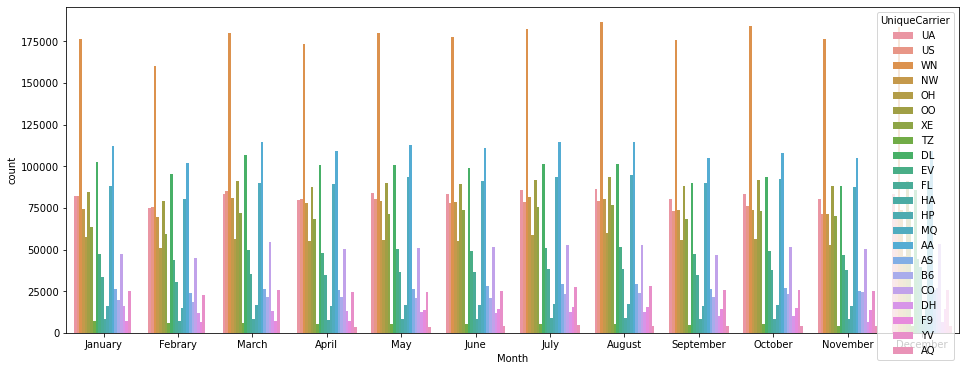

In [12]:
plt.figure(figsize = (16,6))
sns.countplot(x='Month',data=df,hue='UniqueCarrier')

<Figure size 1152x432 with 0 Axes>

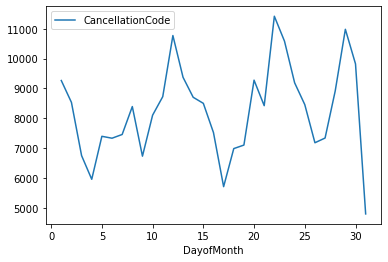

In [13]:
plt.figure(figsize = (16,6))
df[['DayofMonth','CancellationCode']].groupby(['DayofMonth']).count().plot()
plt.show()

[Text(0.0, 0, 'Monday'),
 Text(1.0, 0, 'Tuesday'),
 Text(2.0, 0, 'Wednesday'),
 Text(3.0, 0, 'Thursday'),
 Text(4.0, 0, 'Friday'),
 Text(5.0, 0, 'Saturday'),
 Text(6.0, 0, 'Sunday')]

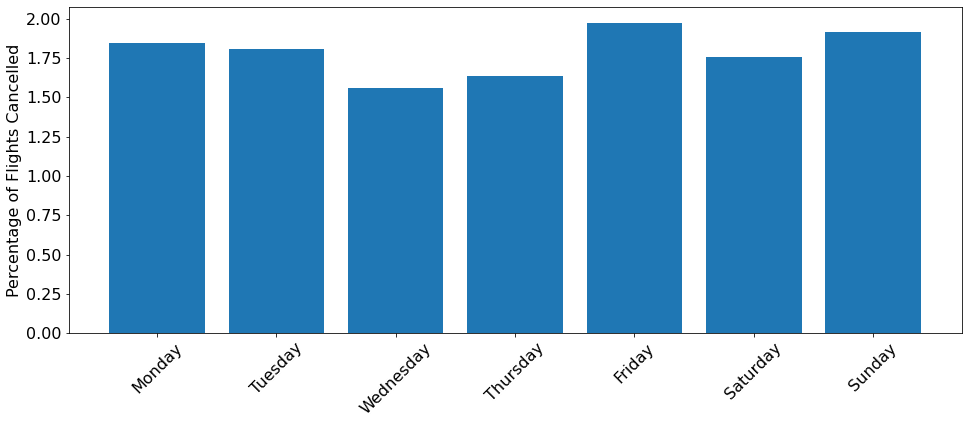

In [14]:
font = {'size'   : 16}
plt.rc('font', **font)
cancelled = df[df['Cancelled']==1]
days_cancelled = cancelled['Cancelled'].groupby(df['DayOfWeek']).count()
days_total = df['Cancelled'].groupby(df['DayOfWeek']).count()
days_frac = np.divide(days_cancelled, days_total)
x=days_frac.index.values
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
fig, ax = plt.subplots(figsize = (16,6))
ax.bar(x,days_frac*100, align='center')
ax.set_ylabel('Percentage of Flights Cancelled')
ax.set_xticks(x)
ax.set_xticklabels(week, rotation = 45)

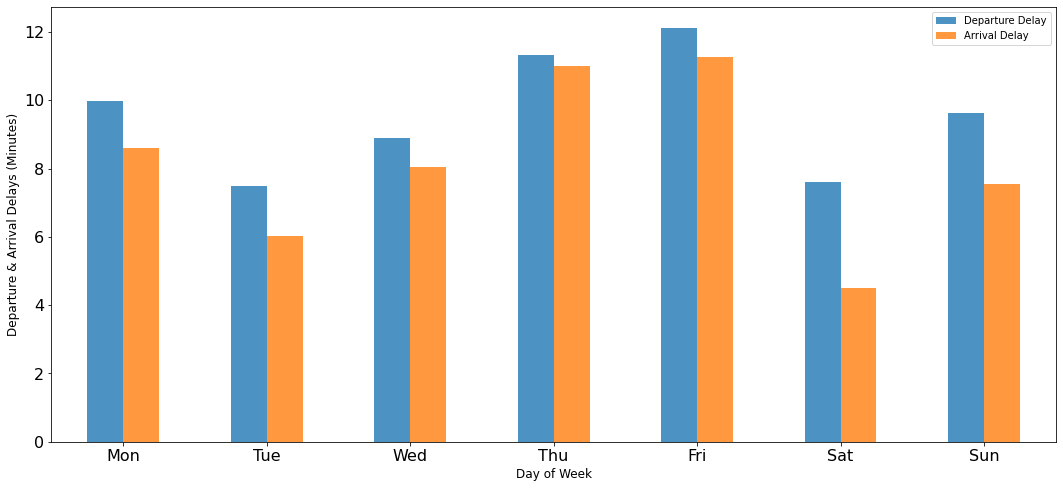

In [15]:
ax=df1.groupby('DayOfWeek')[['DepDelay','ArrDelay']].mean().plot.bar(rot=0, alpha=0.8, figsize=[18,8])
ax.set_ylabel("Departure & Arrival Delays (Minutes)",fontsize=12)
ax.set_xlabel("Day of Week",fontsize=12)
ax.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
ax.legend(['Departure Delay','Arrival Delay'], fontsize=10 )

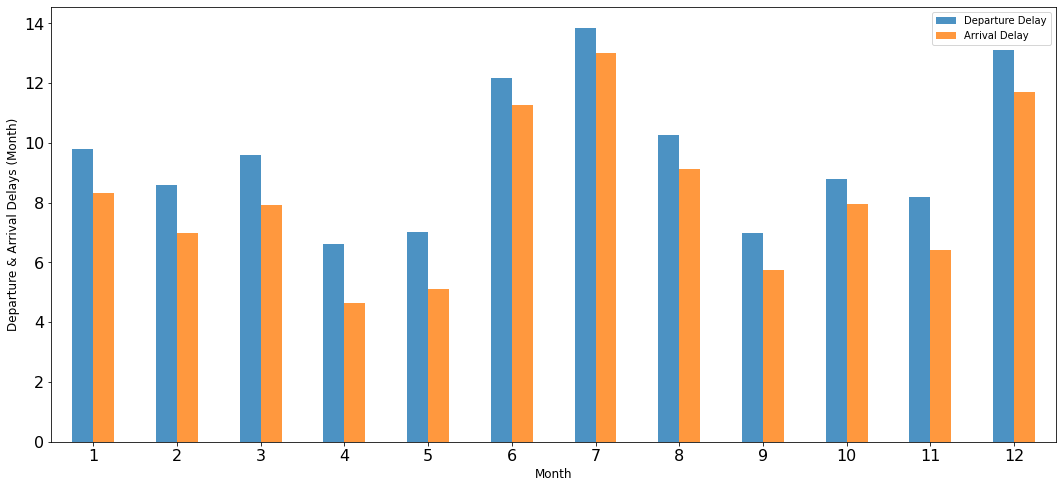

In [16]:
ax=df1.groupby('Month')[['DepDelay','ArrDelay']].mean().plot.bar(rot=0, alpha=0.8, figsize=[18,8])
ax.set_ylabel("Departure & Arrival Delays (Month)",fontsize=12)
ax.set_xlabel("Month",fontsize=12)
#ax.set_xticklabels(df['Month'])
ax.legend(['Departure Delay','Arrival Delay'], fontsize=10 )

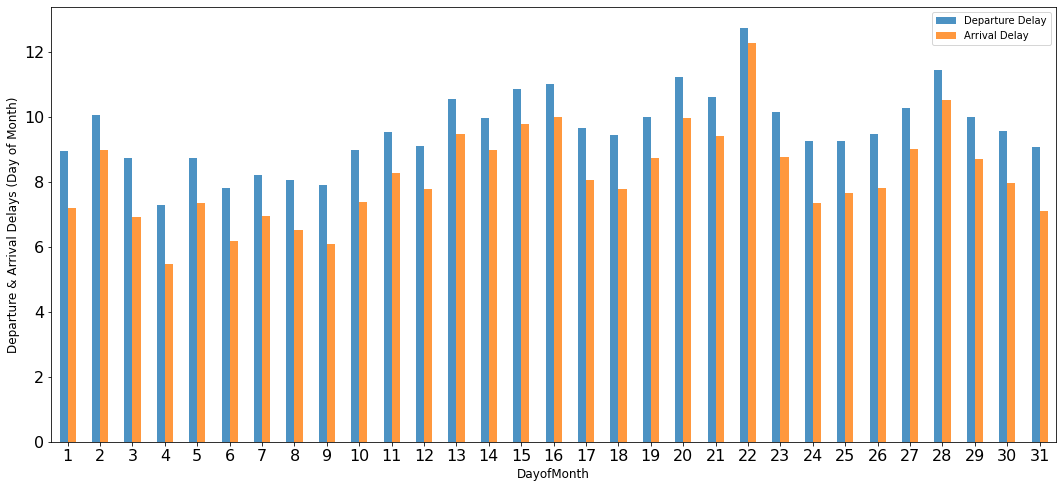

In [17]:
ax=df1.groupby('DayofMonth')[['DepDelay','ArrDelay']].mean().plot.bar(rot=0, alpha=0.8, figsize=[18,8])
ax.set_ylabel("Departure & Arrival Delays (Day of Month)",fontsize=12)
ax.set_xlabel("DayofMonth",fontsize=12)
#ax.set_xticklabels(df['Month'])
ax.legend(['Departure Delay','Arrival Delay'], fontsize=10 )

#### Q1 - Answer : Best time to avoid delay is in the month of April, 4th Day Of Month and on Saturday

 ### Q2 - Do older planes suffer more delays?

In [18]:
planes_data.head(200)

,tailnum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195,N13908,Corporation,EMBRAER,05/31/2002,EMB-145LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
196,N13913,Corporation,EMBRAER,05/25/2001,EMB-145LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
197,N13914,Corporation,EMBRAER,05/09/2001,EMB-145LR,Valid,Fixed Wing Multi-Engine,Turbo-Fan,2001
198,N13929,Corporation,EMBRAER,11/29/1997,EMB-145EP,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1997


In [19]:
airplane_df = planes_data.rename(columns = {'tailnum': 'TailNum', 'year': 'pln_mfg_year'}, inplace = False)

In [20]:
airplane_df.head()

,TailNum,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,pln_mfg_year
0,N050AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,N051AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,N052AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,N054AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,N055AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#Merging plane dataset with the flight one to get the year
df_plane_data = pd.merge(df, airplane_df, on='TailNum')

MemoryError: Unable to allocate 517. MiB for an array with shape (6, 11295340) and data type int64

In [ ]:
df_plane_data.head()

In [ ]:
df_plane_data.columns

In [ ]:
df_plane_data_agg = df_plane_data.groupby('pln_mfg_year')[['DepDelay','ArrDelay']].sum()

In [ ]:
df_plane_data_agg.head()

In [ ]:
df_plane_data_agg = df_plane_data_agg.reset_index()

In [ ]:
#plt.figure(figsize=(50,8))
sns.catplot(x="pln_mfg_year", y="ArrDelay", kind="bar", data=df_plane_data_agg,height=50, aspect=8.27)

#### Q2 - Answer : Looking at the bar chart above, older plane suffers less delay as the mfg year progresses.

### Q3 - How does the number of people flying between different locations change over time?

In [ ]:
df_location = df[['Year','Month','DayofMonth','DayOfWeek','Origin','Dest','Distance']]

In [ ]:
df_location.head()

In [ ]:
#Lets check for the people count from travelling to BOS to ORD
df_loc =df_location[(df['Origin'] == 'BOS') &
              (df['Dest'] == 'ORD')]

In [ ]:
plt.figure(figsize = (16,6))
df_loc.groupby(['Month']).size().plot()
plt.show()

In [ ]:
plt.figure(figsize = (16,6))
df_loc.groupby(['DayOfWeek']).size().plot()
plt.show()

In [ ]:
plt.figure(figsize = (16,6))
df_loc.groupby(['DayofMonth']).size().plot()
plt.show()

#### Q3 - ANSWER: Looking at the above graphs, it seems like people travel pattern from BOS to ORD is less at the end of the month, and on Saturdays and  in May-June month.

### Q4 - Can you detect cascading failures as delays in one airport create delays in others?

In [ ]:
df_analysis = df[['DayofMonth','UniqueCarrier','TailNum','Origin','Dest','Distance','CRSDepTime','DepTime','DepDelay','CRSArrTime','ArrTime','ArrDelay']]


In [ ]:
df_analysis.head(5)

In [ ]:
rslt_df = df_analysis[(df_analysis['DepDelay'] > 0) &
              (df_analysis['ArrDelay'] > 0)]

In [ ]:
rslt_df[(rslt_df['DayofMonth']==11) & (rslt_df['TailNum']=='N902UA')].head(1)

#### Q4 - Anwer: Yes, there are cascading failures as delays in one airport create delays in others. For example:

In [ ]:
rslt_df[(rslt_df['DayofMonth']==11) & (rslt_df['TailNum']=='N902UA')].head(2)

##### Flight ‘N902UA’ has to depart at 1554 (3.54 PM) ON 11 of the MONTH; but it is departed at 16:58 (4.58 PM). It is ~1 Hr delayed. It is flew from DFW to ORD . Now it supposed to reached at 22:23 (10.23 PM), but reached at 22:59 ( 10.59 PM).




##### Now let see what happened at ORD airport at 11 of the MONTH?

In [ ]:
#ADD A DATAFRAME HERE

rslt_df[(rslt_df['DayofMonth']==11) & (rslt_df['TailNum']=='N902UA')].head(2)



#### At ORD airport flight ‘N348UA’ depart late. It suppose to depart at 19:00 (7.00 PM) but actually it is departed at 07:46 (7.46 PM) 46 minutes delayed. 


#### Similarly we can observe same ‘N920UA’ delayed by 1 hr 5 minutes.

### Q5 - Use the available variables to construct a model that predicts delays.

In [5]:
df_modelling = df[['DayofMonth','Year','DayOfWeek','UniqueCarrier','TailNum','Origin','Dest','Distance','CRSDepTime','DepTime','DepDelay','CRSArrTime','ArrTime','ArrDelay',
                      'TaxiIn','TaxiOut','Cancelled','CarrierDelay','WeatherDelay','NASDelay','SecurityDelay'
                  ]]


In [6]:
df_modelling = df_modelling.head(1000)

In [7]:
df_modelling.shape

(1000, 21)

In [8]:
df_modelling['ARR_DELAY'] = 0
df_modelling['ARR_DELAY'].mask(df_modelling['ArrDelay'] > 0, 1, inplace=True)

In [9]:
df_modelling.head()

,DayofMonth,Year,DayOfWeek,UniqueCarrier,TailNum,Origin,Dest,Distance,CRSDepTime,DepTime,...,ArrTime,ArrDelay,TaxiIn,TaxiOut,Cancelled,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,ARR_DELAY
0,28,2005,5,UA,N935UA,BOS,ORD,867,1605,1603.0,...,1741.0,-18.0,4,23,0,0,0,0,0,0
1,29,2005,6,UA,N941UA,BOS,ORD,867,1605,1559.0,...,1736.0,-23.0,6,15,0,0,0,0,0,0
2,30,2005,7,UA,N342UA,BOS,ORD,867,1610,1603.0,...,1741.0,-24.0,9,18,0,0,0,0,0,0
3,31,2005,1,UA,N326UA,BOS,ORD,867,1605,1556.0,...,1726.0,-33.0,11,10,0,0,0,0,0,0
4,2,2005,7,UA,N902UA,ORD,BOS,867,1900,1934.0,...,2235.0,3.0,5,10,0,0,0,0,0,1


In [10]:
# Define numbers by actual days and months.
df_modelling.loc[df_modelling['DayOfWeek'] == 'Monday', ['DayOfWeek']] = 1
df_modelling.loc[df_modelling['DayOfWeek'] == 'Tuesday', ['DayOfWeek']] = 2
df_modelling.loc[df_modelling['DayOfWeek'] == 'Wednesday', ['DayOfWeek']] =3 
df_modelling.loc[df_modelling['DayOfWeek'] == 'Thursday', ['DayOfWeek']] = 4
df_modelling.loc[df_modelling['DayOfWeek'] == 'Friday', ['DayOfWeek']] = 5
df_modelling.loc[df_modelling['DayOfWeek'] == 'Saturday', ['DayOfWeek']] =6 
df_modelling.loc[df_modelling['DayOfWeek'] == 'Sunday', ['DayOfWeek']] = 7

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Segregating the Independent and the dependant variable
y = df_modelling["ARR_DELAY"].values
X = df_modelling.drop(["ARR_DELAY",'UniqueCarrier','TailNum','Origin','Dest'],axis =1)


In [12]:
#Applying Logistic Regression
LR = LogisticRegression()

#Spliting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

LR.fit(X_train, y_train)
LR.score(X_test,y_test)

C:\Users\wokie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9833333333333333

In [13]:
#Fitting Logistic Regression model to the dataset

y_pred_lr = LR.predict(X_test)
from sklearn.metrics import classification_report
model_report = classification_report(y_test, y_pred_lr)
print(model_report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       128
           1       0.99      0.98      0.99       172

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



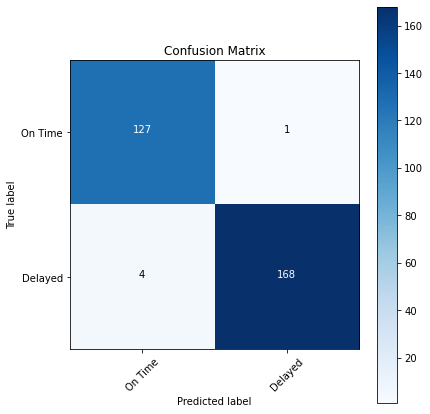

In [14]:
#Function to plot the confusion Matrix
from sklearn.metrics import auc,confusion_matrix

confusion_mat = confusion_matrix(y_test,y_pred_lr)
import itertools
def plot_confusion_matrix(model,normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["On Time", "Delayed"]
    cmap = plt.cm.Blues
    title = f"Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
plt.figure(figsize=(6,6))
plot_confusion_matrix(y_pred_lr, normalize=False)
plt.show()

#### Q5 - Answer: Logistic Regression can predicts the  delay with  98% of accuracy.